In [1]:
import pandas as pd

df1= pd.read_csv('train.csv')

df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
df1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df2=pd.read_csv('train.csv')

pd.crosstab(df2['Sex'], df2['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


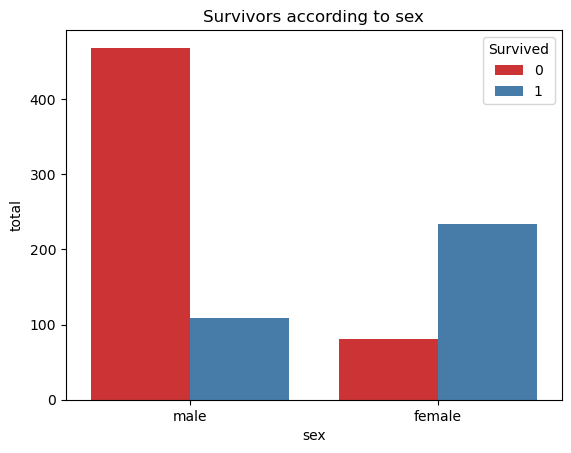

In [5]:
ax=sns.countplot(x="Sex", hue="Survived", palette='Set1', data=df2)
ax.set(title='Survivors according to sex', xlabel='sex', ylabel='total')
plt.show()

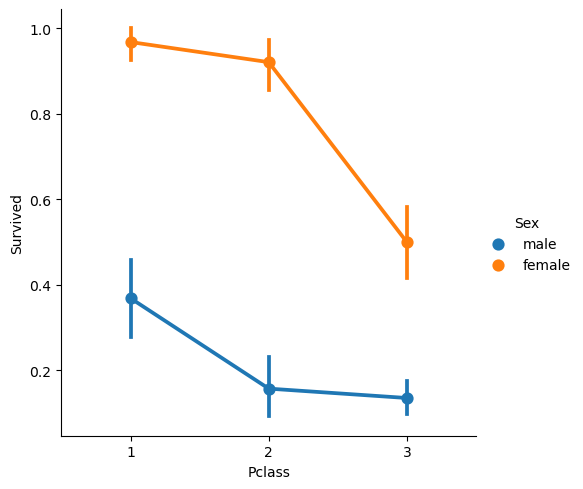

In [6]:
sns.catplot(x='Pclass', y='Survived', hue='Sex', data=df2, kind='point')

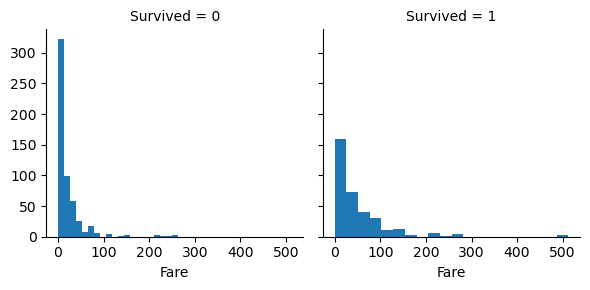

In [7]:
graph=sns.FacetGrid(df2, col='Survived')
graph.map(plt.hist, 'Fare', bins=20)

In [8]:
df2.loc[df2['Fare']>400, 'Fare']=df2['Fare'].median()

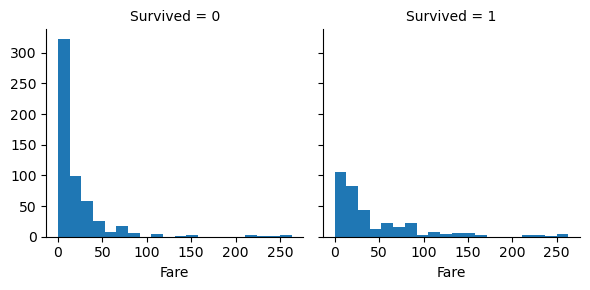

In [9]:
graph=sns.FacetGrid(df2, col='Survived')
graph.map(plt.hist, 'Fare', bins=20)

In [10]:
for column in df2:
    print(column, ': ', df2[column].isnull().sum())

PassengerId :  0
Survived :  0
Pclass :  0
Name :  0
Sex :  0
Age :  177
SibSp :  0
Parch :  0
Ticket :  0
Fare :  0
Cabin :  687
Embarked :  2


In [11]:
df2['Age'].fillna(df2['Age'].median(), inplace=True)

In [12]:
print(df2['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [13]:
df2['Embarked'].fillna('S', inplace=True)

In [14]:
del df2['Cabin']

In [15]:
for column in df2:
    print(column, ': ', df2[column].isnull().sum())

PassengerId :  0
Survived :  0
Pclass :  0
Name :  0
Sex :  0
Age :  0
SibSp :  0
Parch :  0
Ticket :  0
Fare :  0
Embarked :  0


In [16]:
def get_title(name):
    if '.' in name:
        return name.split(',')[1].split('.')[0].strip()
    else:
        return 'no title'

In [17]:
titles=set([x for x in df2.Name.map(lambda x: get_title(x))] )
titles

{'Capt',
 'Col',
 'Don',
 'Dr',
 'Jonkheer',
 'Lady',
 'Major',
 'Master',
 'Miss',
 'Mlle',
 'Mme',
 'Mr',
 'Mrs',
 'Ms',
 'Rev',
 'Sir',
 'the Countess'}

In [18]:
def shorter_title(x):
    title=x['Title']
    if title in['Capt','Col','Major']:
        return 'Officer'
    elif title in['Jonkheer','Don','Lady','Master','the Countess','Rev']:
        return 'Royalty'
    elif title in['Miss','Mlle','Mme','Mrs','Ms']:
        return "Miss"
    elif title in ['Sir','Mr']:
        return 'Mr'
    else:
        return  title
    

In [19]:
df2['Title']=df2['Name'].map(lambda x: get_title(x))

In [20]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


In [21]:
df2['Title']=df2.apply(shorter_title, axis=1)

In [22]:
df2

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Miss
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Miss
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Royalty
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,Mr


In [23]:
print(df2.Title.value_counts())

Mr         518
Miss       311
Royalty     50
Dr           7
Officer      5
Name: Title, dtype: int64


In [24]:
df2.drop('Name', axis=1, inplace=True)
df2.drop('Ticket', axis=1, inplace=True)

In [25]:
df2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Miss
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Miss
4,5,0,3,male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,Royalty
887,888,1,1,female,19.0,0,0,30.0000,S,Miss
888,889,0,3,female,28.0,1,2,23.4500,S,Miss
889,890,1,1,male,26.0,0,0,30.0000,C,Mr


In [26]:
df2.Sex.replace(('male','female'),(0,1), inplace=True)
df2.Embarked.replace(('S','C','Q'),(0,1,2), inplace=True)
df2.Title.replace(('Mr','Miss','Royalty','Dr','Officer'),(0,1,2,3,4), inplace=True)

In [27]:
df2

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,0,0
1,2,1,1,1,38.0,1,0,71.2833,1,1
2,3,1,3,1,26.0,0,0,7.9250,0,1
3,4,1,1,1,35.0,1,0,53.1000,0,1
4,5,0,3,0,35.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0,13.0000,0,2
887,888,1,1,1,19.0,0,0,30.0000,0,1
888,889,0,3,1,28.0,1,2,23.4500,0,1
889,890,1,1,0,26.0,0,0,30.0000,1,0


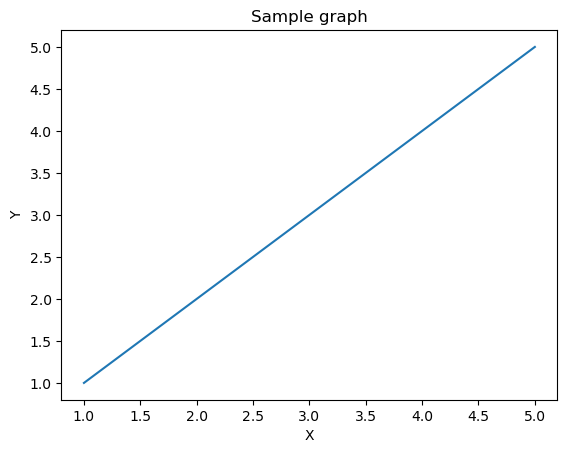

In [28]:
import matplotlib.pyplot as plt
x=[1,2,3,4,5]
y=[1,2,3,4,5]
plt.plot(x,y)
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Sample graph')
plt.show()



In [29]:
import pandas as pd

df3=pd.read_csv('train.csv')
df3

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [30]:
y=df3['Survived']
x=df3.drop(['Survived', 'PassengerId'], axis=1)
x

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [31]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest=train_test_split(x,y,test_size=0.1)

In [32]:
import pickle

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

y=df2['Survived']
x=df2.drop(['Survived', 'PassengerId'], axis=1)
xtrain, xval, ytrain, yval=train_test_split(x,y,test_size=0.1)

xtrain

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
813,3,1,6.0,4,2,31.2750,0,1
721,3,0,17.0,1,0,7.0542,0,0
690,1,0,31.0,1,0,57.0000,0,0
666,2,0,25.0,0,0,13.0000,0,0
385,2,0,18.0,0,0,73.5000,0,0
...,...,...,...,...,...,...,...,...
433,3,0,17.0,0,0,7.1250,0,0
526,2,1,50.0,0,0,10.5000,0,1
753,3,0,23.0,0,0,7.8958,0,0
177,1,1,50.0,0,0,28.7125,1,1


In [37]:
randomforest=RandomForestClassifier()
randomforest.fit(xtrain, ytrain)
ypred=randomforest.predict(xval)
accrandomforest=round(accuracy_score(ypred, yval)*100, 2)
print("Accuracy: {}".format(accrandomforest))


Accuracy: 82.22


In [38]:
pickle.dump(randomforest,open('titanic_model.sav','wb'))

In [39]:
predictions=randomforest.predict(df2)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- PassengerId
- Survived
